In [4]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
col_names = ["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"]
pima = pd.read_csv(url, header=None, names=col_names)

In [5]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# define X and y
feature_cols = ["pregnant", "insulin", "bmi", "age"]
X = pima[feature_cols]
y = pima.label

In [7]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
y_pred_class = logreg.predict(X_test)

In [10]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.692708333333


In [11]:
# examine the class distribution of testing set
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [12]:
# calculate the percentage of 1
y_test.mean()

0.32291666666666669

In [13]:
# calculate the percentage of 0
1 - y_test.mean()

0.67708333333333326

In [14]:
# calculate null accuracy for binary classification
max(y_test.mean(), 1 - y_test.mean())

0.67708333333333326

In [15]:
# calculate null accuracy for multi-class classification
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: label, dtype: float64

In [16]:
print("true: ", y_test.values[0:25])
print("pred: ", y_pred_class[0:25])

true:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
pred:  [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
# Confusion Matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


In [18]:
# safe confusion matrix and slice into 4 pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [19]:
# Classification Accuracy - how many predictions are correct?
print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.692708333333
0.692708333333


In [20]:
# Classification Error - how many predictions are wrong?
print((FP + FN) / (TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test,  y_pred_class))

0.307291666667
0.307291666667


In [21]:
# Sensitivity - when the actual value is positive, how often is the prediction true?
print(TP / (TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.241935483871
0.241935483871


In [22]:
# Specificity - when the actual value is negative, how often is the prediction correct?
print(TN / (TN + FP))

0.907692307692


In [23]:
# False Positive Rate - when the actual value is negative, how often is the prediction incorrect?
print(FP / (TN + FP))

0.0923076923077


In [24]:
# Precision - when a positive value is predicted, how often is the prediction correct?
print(TP / (TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.555555555556
0.555555555556


In [25]:
# first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [27]:
# first 10 predicted probabilities of class membership
# for each observation, shows probability of 0 and 1
logreg.predict_proba(X_test)[0:10, :]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [28]:
# predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

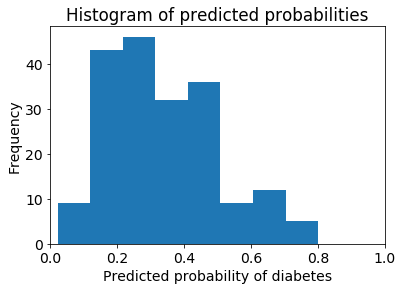

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 14
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title("Histogram of predicted probabilities")
plt.xlabel("Predicted probability of diabetes")
plt.ylabel("Frequency")

In [31]:
# predict diabetes if the predicted probability is greater than 0.3
import numpy as np
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob, 0.3)[0]

G:\Users\Av\Miniconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [32]:
# first 10 predicted probabilities
y_pred_prob[0:10]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [33]:
# now there are 5 ones
y_pred_class[0:10]

array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.])

In [34]:
# compare confusion
print(confusion)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]
[[80 50]
 [16 46]]


In [35]:
# sensitivity has increased (used to be 0.24)
print(46 / (46 + 16))
# specificity has decreased (used to be 0.91)
print(80 / (80 + 50))

0.7419354838709677
0.6153846153846154


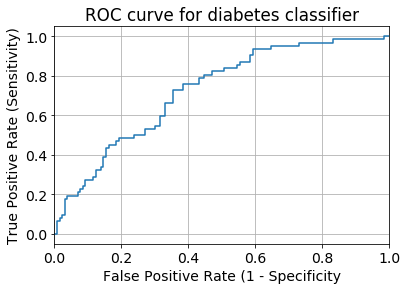

In [36]:
# first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylabel([0.0, 1.0])
plt.title("ROC curve for diabetes classifier")
plt.xlabel("False Positive Rate (1 - Specificity")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.grid(True)

In [37]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print("Sensitivity", tpr[thresholds > threshold][-1])
    print("Specificity", 1 - fpr[thresholds > threshold][-1])

In [38]:
evaluate_threshold(0.5)

Sensitivity 0.241935483871
Specificity 0.907692307692


In [39]:
evaluate_threshold(0.3)

Sensitivity 0.725806451613
Specificity 0.615384615385


In [40]:
# first arg is true values, second arg is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.724565756824


In [41]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring="roc_auc").mean()

0.73782336182336183